In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from sklearn.preprocessing import StandardScaler, RobustScaler, Normalizer
import seaborn as sns
import math
# Ignore sklearn warning for now
import warnings
warnings.filterwarnings('ignore') 
import seaborn as sns
import os
sns.set_style("whitegrid")

# Summary

This notebook explores parallel coordinates for multidimensional data visualization and analysis. 

The data consists age, BMI and biochemical parameters from blood samples from 81 participants.

In [3]:
norm_data=pd.read_csv('norm_data_Andrews_shuffled.csv', index_col=0)
norm_data.shape

(81, 25)

Text(0.5, 1.0, 'All participants')

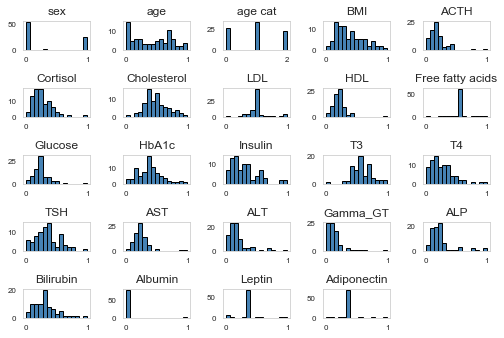

In [4]:
norm_data.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False)    

plt.tight_layout(rect=(0, 0, 1.2, 1.2)) 
plt.title("All participants")

# Binary classification
We group the four weight categories 'Underweight','Normal Weight', 'Overweight', 'Obese' into two: 'Underweight and Normal Weight' AND 'Overweight and Obese'

In [5]:
norm_data['BMI cat'].replace(['Underweight','Normal Weight', 'Overweight', 'Obese'],[0,0,1,1],inplace=True)

## Parallel plots or Andrews curves

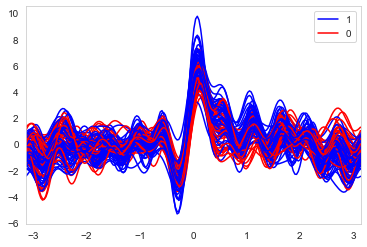

In [6]:
pd.plotting.andrews_curves(norm_data, 'BMI cat', color = ['b','r'])
plt.savefig('Andrews_binary.png',dpi = 400, bbox_inches='tight')

In [7]:
rho = norm_data.corrwith(norm_data['BMI cat']).sort_values()[::-1][1:]
rho

BMI                 0.733148
Insulin             0.384333
Leptin              0.348167
age                 0.305288
Gamma_GT            0.295794
age cat             0.283489
ALT                 0.242789
HbA1c               0.226459
Cholesterol         0.154699
LDL                 0.109729
AST                 0.072143
Glucose             0.039604
Bilirubin           0.033021
T3                  0.013794
TSH                -0.008560
ALP                -0.064260
Free fatty acids   -0.066765
sex                -0.068654
HDL                -0.074240
T4                 -0.083757
ACTH               -0.089661
Cortisol           -0.116745
Albumin            -0.153107
Adiponectin        -0.230327
dtype: float64

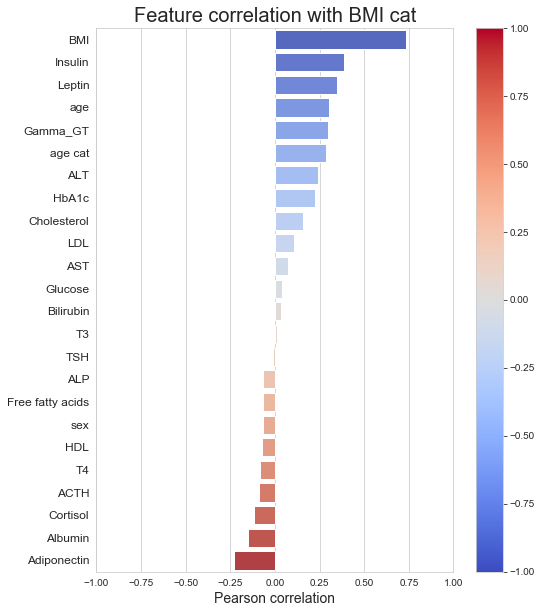

In [8]:
norm = plt.Normalize(-1,1)
sm = plt.cm.ScalarMappable(cmap="coolwarm", norm=norm)
sm.set_array([])
plt.figure(figsize=[8, 10])
plt.title("Feature correlation with BMI cat", fontsize=20)
sns.barplot(x=rho.values.squeeze(), y=rho.index, palette="coolwarm", orient="h")
plt.yticks(fontsize=12)
plt.xlabel("Pearson correlation", fontsize=14)
plt.colorbar(sm)
plt.xlim([-1, 1])
plt.savefig('correlation.png',dpi = 400, bbox_inches='tight')

In [9]:
noise = 0.2*np.random.randn(norm_data.shape[0],norm_data.shape[1])
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(norm_data), columns=norm_data.columns)
data_noise = data_scaled + noise
data_noise['BMI cat'] = norm_data['BMI cat']
data_noise = data_noise[['BMI cat'] + list(rho.index)]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]), <a list of 24 Text xticklabel objects>)

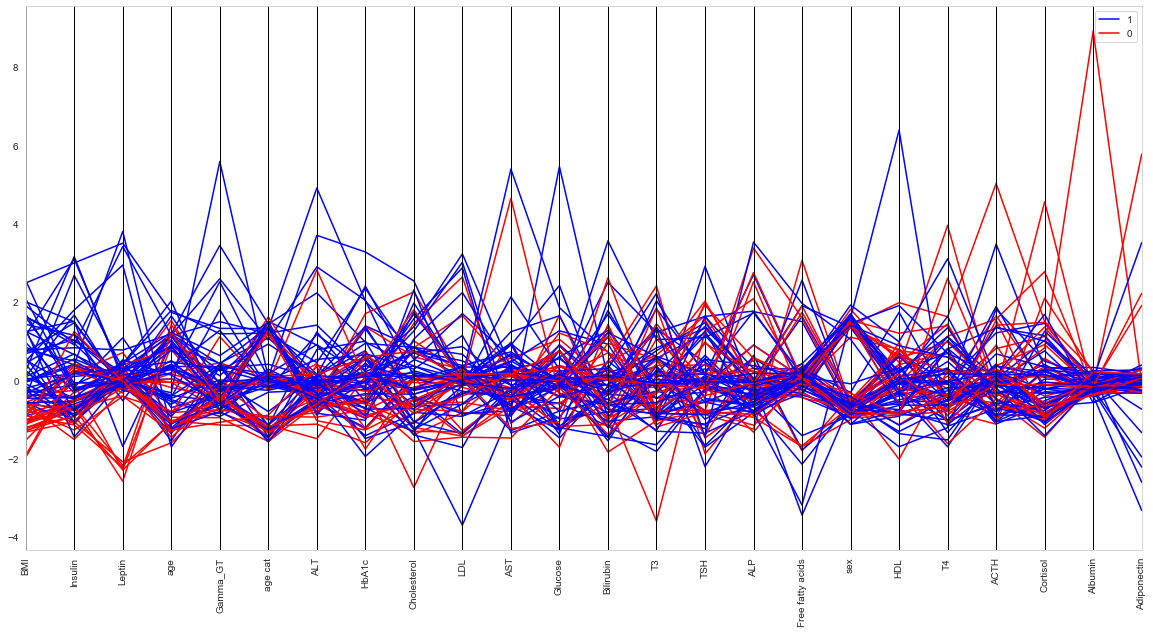

In [10]:
plt.figure(figsize=[20,10])
pd.plotting.parallel_coordinates(data_noise, 'BMI cat', color = ['b','r'])
plt.xticks(rotation = 90)
#plt.savefig('Andrews_binary.png',dpi = 400, bbox_inches='tight')

## From Fig above, leptin seems to be a good feature to classify participants into (underweight + normal weight) and (overweight + obese)

In [11]:
rho2 = data_scaled.corr()
mask = np.triu(rho2)
np.fill_diagonal(mask, False)

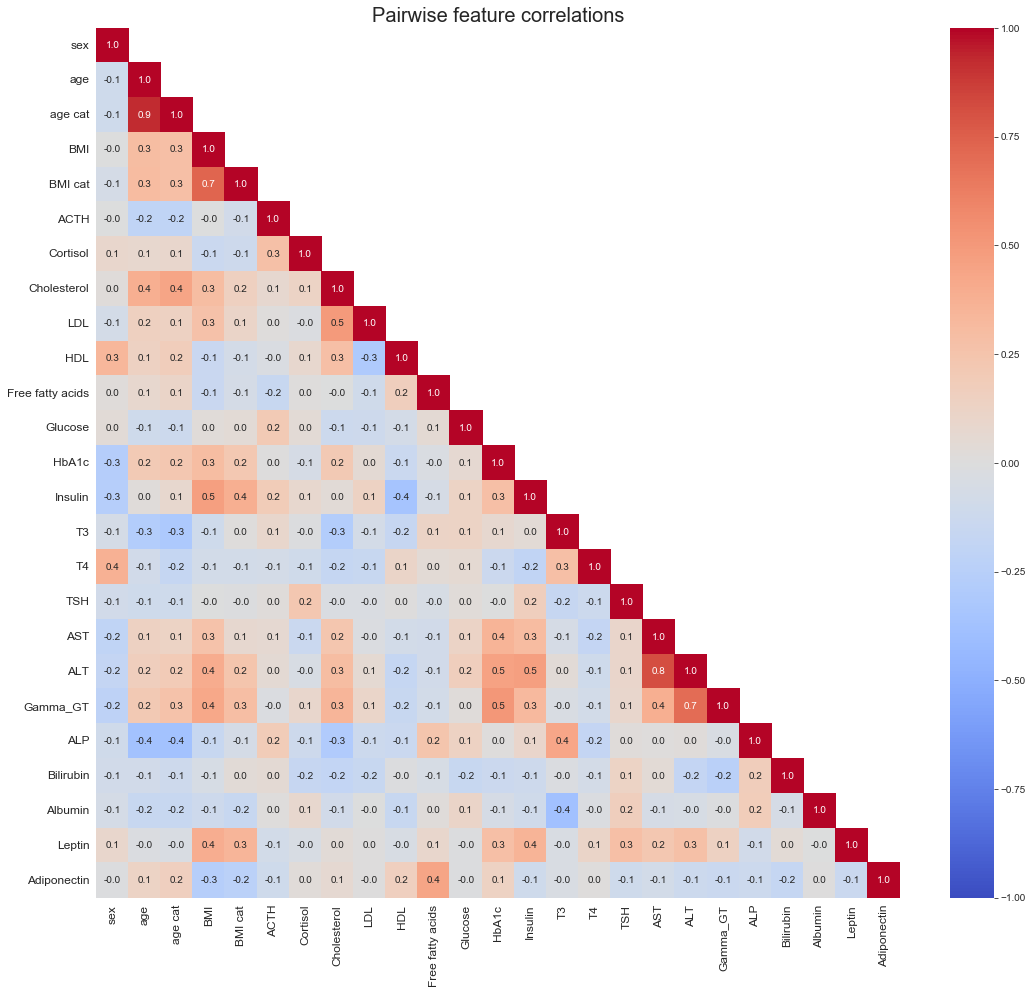

In [13]:
plt.figure(figsize=[18, 16])
plt.title("Pairwise feature correlations", fontsize=20)
ax = sns.heatmap(rho2, mask=mask, annot=True, fmt=".1f", vmin=-1, vmax=1, cmap='coolwarm')
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.savefig('correlation_matrix.png', dpi = 400, bbox_inches='tight')